In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
import json

In [32]:
def print_config(name):
# read and print .json file
   with open('e:/Wind/Scripts/MultipleData/configsjm/'+ name + '.json') as json_file:
      data = json.load(json_file)
      pprint.pprint(data)
   return

### RF baseline

In [33]:
query = {"experiment": "JM_RF_s2s_2","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

MEAN (test)= 6.770120707927505
StDev (test)= 0.8047620859978747


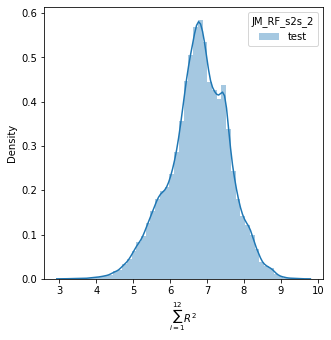

In [34]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test']), figsize=(5,5))

### CNN 2L

In [35]:
query = {"experiment": "JM_CNN_2L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [36]:
print_config('config_CNN_2L_s2s')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.3,
          'drop2': 0.2,
          'filters': [128],
          'filters2': [128],
          'full': [512],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'mode': 'CNN_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN-2L',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


MEAN (test)= 7.2257681101353555
StDev (test)= 0.8005374713628273
MEAN (val)= 6.90798312324942
StDev (val)= 0.7355034172464132


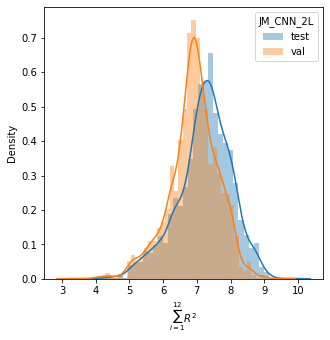

In [37]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN 3L

In [38]:
query = {"experiment": "JM_CNN_3L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [39]:
print_config('config_CNN_3L_s2s')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.2,
          'drop2': 0.6,
          'drop3': 0.5,
          'filters': [128],
          'filters2': [256],
          'filters3': [256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'kernel_size3': [1],
          'mode': 'CNN_3l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_3l_s2s',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter

MEAN (test)= 7.222775421958853
StDev (test)= 0.800938320127753
MEAN (val)= 6.894758287688494
StDev (val)= 0.7343124541330225


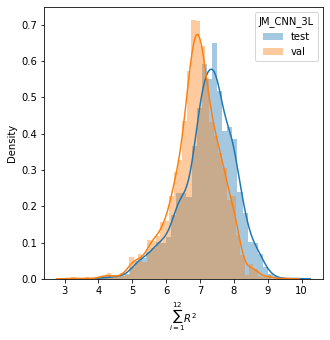

In [40]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN 4L

In [41]:
query = {"experiment": "JM_CNN_4L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [42]:
print_config('config_CNN_4L_s2s')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.2,
          'drop2': 0.6,
          'drop3': 0.5,
          'drop4': 0.5,
          'filters': [128],
          'filters2': [256],
          'filters3': [256],
          'filters4': [256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'kernel_size3': [1],
          'kernel_size4': [1],
          'mode': 'CNN_4l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1],
          'strides4': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'al

MEAN (test)= 7.189581095506534
StDev (test)= 0.8035263770810934
MEAN (val)= 6.858041511353047
StDev (val)= 0.7332900243052706


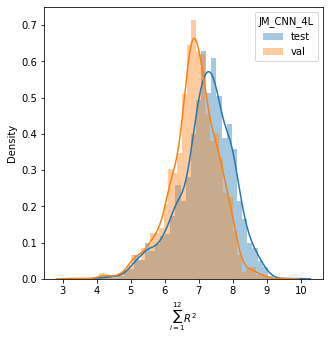

In [43]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN-Sep 1 layer

In [44]:
query = {"experiment": "JM_CNN_sep","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.300770611159176
StDev (test)= 0.7976043347984896
MEAN (val)= 6.991350820234412
StDev (val)= 0.7522393958362509


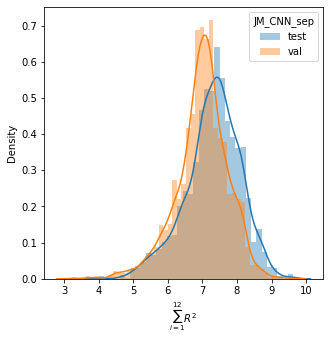

In [45]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### JM_SEP_2l (2000 sites)

In [46]:
query = {"experiment": "JM_CNN_sep_2l_B","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.320931027921126
StDev (test)= 0.7979096196569432
MEAN (val)= 7.008636432620585
StDev (val)= 0.7542893131604126


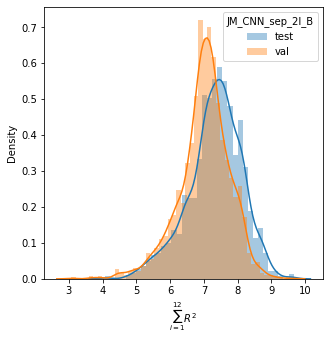

In [47]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### JM_SEP_2l (126.692 sites)

In [48]:
query = {"experiment": "JM_CNN_sep_2l_FULL","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

MEAN (test)= 7.316929105499875
StDev (test)= 0.8044699625439071
MEAN (val)= 7.002531903529451
StDev (val)= 0.7503857559258261


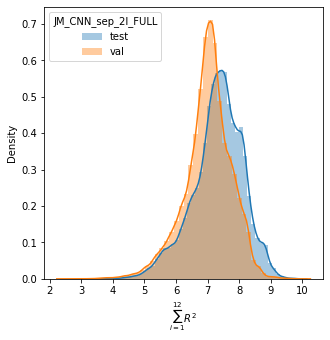

In [49]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### JM_sep_3l 

In [50]:
query = {"experiment": "JM_CNN_sep_3l","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.301759195389126
StDev (test)= 0.7957460874531367
MEAN (val)= 6.9883294035429095
StDev (val)= 0.7458061735753356


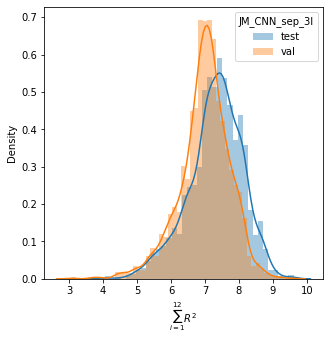

In [51]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### JM_sep_4l

In [52]:
query = {"experiment": "JM_CNN_sep_4l","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.832675006428014
StDev (test)= 0.8087558110143385
MEAN (val)= 6.519693567567577
StDev (val)= 0.7567396481593395


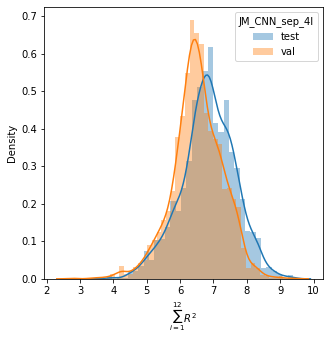

In [53]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN_Baseline

In [54]:
query = {"experiment": "JM_CNN_C","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.184909490615683
StDev (test)= 0.8020160422549318
MEAN (val)= 6.867822678018074
StDev (val)= 0.7540981083149264


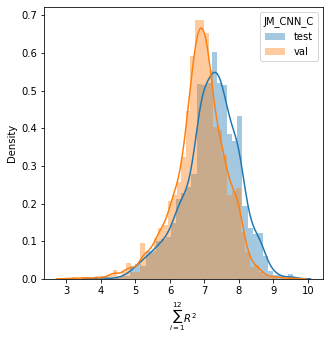

In [55]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

# Skip 1layer skip beg to end

In [56]:
query = {"experiment": "JM_CNN_skip","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.241592402309542
StDev (test)= 0.7962717689202391
MEAN (val)= 6.93495550796522
StDev (val)= 0.7508017101483752


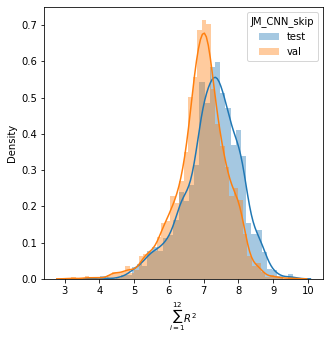

In [57]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Gradient Boosting vanilla CNN

In [59]:
query = {"experiment": "JM_CNN_GB","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.218917798055141
StDev (test)= 0.7982300385354558
MEAN (val)= 6.916134508920039
StDev (val)= 0.7522489655757946


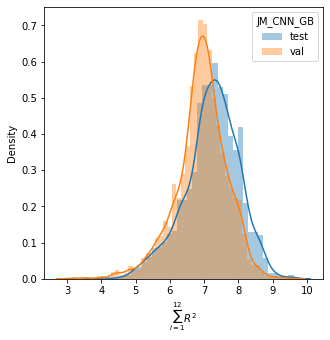

In [60]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Gradient Boosting Separables CNN

In [61]:
query = {"experiment": "JM_CNN_sep_2l_GB1","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1985

MEAN (test)= 7.341460494413647
StDev (test)= 0.7955465724947584
MEAN (val)= 7.042803619401421
StDev (val)= 0.7530766517785474


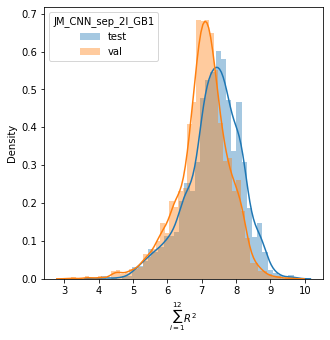

In [62]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Plot Comparison

In [63]:
query1 = {"experiment": "JM_RF_s2s_2","status":"done"}
query2 = {"experiment": "JM_CNN_sep_2l_FULL","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results_compare(query1, query2)
results.selected_size()

126692

In [64]:
results.plot_map_compare(dset=('test'),figsize=(1200,800))

pollo - pollo


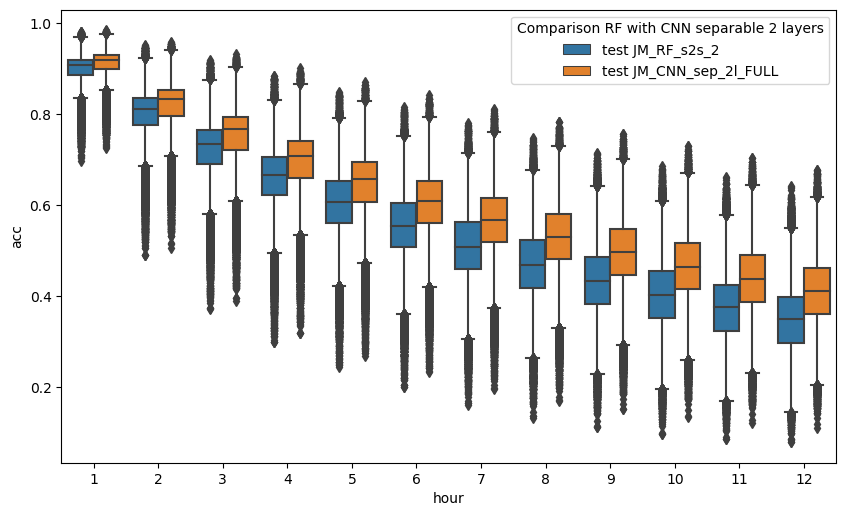

In [65]:
results.plot_hours_boxplot_compare(title = 'Comparison RF with CNN separable 2 layers',save= "Boxplot_RF_CNN_sep", dset=('test'), saveformat = 'pdf', figsize=(10,6))

### Graph Comparison

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {'Experiment':['RF_Baseline', 'CNN_sep_1_Layer', 'CNN_sep_2_Layer',  'CNN_sep_3_Layer', 
        'CNN_sep_4_Layer', 'CNN_Baseline', 'CNN_sep_2_Layer_with GB'],
        'MEAN (test)':[6.770120707927505, 7.300770611159176, 7.320931027921126, 7.301759195389126,
                       6.832675006428014, 7.184909490615683, 7.341460494413647] ,
        'StDev (test)': [0.8047620859978747,0.7976043347984896, 0.7979096196569432, 0.7957460874531367,
                        0.8087558110143385, 0.8020160422549318, 0.7955465724947584],
        'MEAN (val)':[6.532462243553213, 6.991350820234412, 7.008636432620585, 6.9883294035429095,
                     6.519693567567577, 6.867822678018074, 7.042803619401421] ,
        'StDev (val)': [6.532462243553213, 0.7522393958362509, 0.7542893131604126, 0.7458061735753356,
                     0.7567396481593395, 0.7540981083149264, 0.7530766517785474]    
       } 

df = pd.DataFrame(data) 
df = result = df.sort_values(['MEAN (test)', 'MEAN (val)'], ascending=[1, 0])

exps = df['Experiment'].values.tolist()
mean_test = df['MEAN (test)'].values.tolist()
mean_val = df['MEAN (val)'].values.tolist()



In [67]:
exps

['RF_Baseline',
 'CNN_sep_4_Layer',
 'CNN_Baseline',
 'CNN_sep_1_Layer',
 'CNN_sep_3_Layer',
 'CNN_sep_2_Layer',
 'CNN_sep_2_Layer_with GB']

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

[[<matplotlib.axis.YTick at 0x14bf23d7128>,
 [Text(0, 0, 'RF_Baseline'),
  Text(0, 0, 'CNN_sep_4_Layer'),
  Text(0, 0, 'CNN_Baseline'),
  Text(0, 0, 'CNN_sep_1_Layer'),
  Text(0, 0, 'CNN_sep_3_Layer'),
  Text(0, 0, 'CNN_sep_2_Layer'),
  Text(0, 0, 'CNN_sep_2_Layer_with GB')],
 (-0.4, 7)]

Text(0.5, 0, '$\\sum R^2 (i=1, 12)$')

(4, 8)

Text(0.5, 1.0, 'Method Comparison (Validation and Test)')

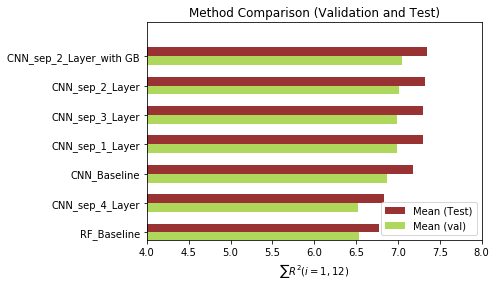

In [68]:



ind = np.arange(len(exps))
width=0.3 

ax = plt.subplot(111)
ax.barh(ind, mean_test, width, align='center', alpha=0.8, color='maroon', label='Mean (Test)') 
ax.barh(ind - width, mean_val, width, align='center', alpha=0.8, color='yellowgreen', label='Mean (val)') 
ax.set(yticks=ind - width/2, yticklabels=exps, ylim=[2*width - 1, len(exps)])
plt.xlabel('$\sum R^2 (i=1, 12)$')
plt.xlim([4,8])

plt.title('Method Comparison (Validation and Test)')
plt.legend()
plt.savefig('e:\method_comparisons.pdf',bbox_inches = "tight")
plt.show()



### MultiHeaded

In [69]:
query = {"experiment": "JM_CNN_CI_s2s","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.8702972672630445
StDev (test)= 0.8248184140827786
MEAN (val)= 6.544036300109385
StDev (val)= 0.770051259184671


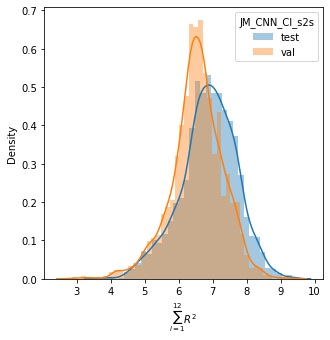

In [70]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Inception Time

In [71]:
query = {"experiment": "JM_DreamTime","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.841453208424476
StDev (test)= 0.7938711548202332
MEAN (val)= 6.548555474650248
StDev (val)= 0.742722293079048


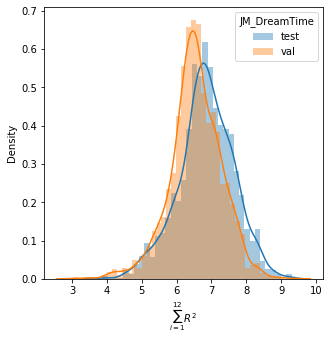

In [72]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### SKIP connections

### SKIP 1Layer

In [73]:
query = {"experiment": "JM_CNN_1L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.935327239201122
StDev (test)= 0.7988283997345355
MEAN (val)= 6.671008462622118
StDev (val)= 0.7303795092141188


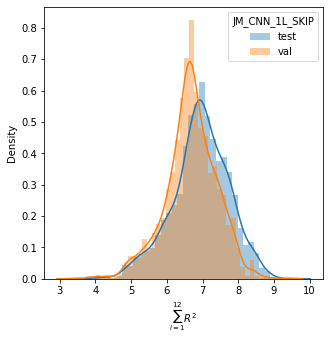

In [74]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [75]:
print_config("config_CNN_1L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.3,
          'filters': [128],
          'full': [16, 8],
          'fulldrop': 0.2,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [5],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_1L_Skip',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### Skip 2Layers

In [76]:
query = {"experiment": "JM_CNN_2L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.2228615372300595
StDev (test)= 0.7981908227717746
MEAN (val)= 6.9044645678636805
StDev (val)= 0.7378184227485595


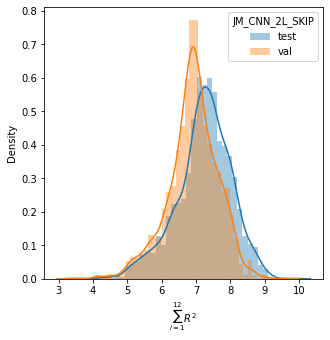

In [77]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [78]:
print_config("config_CNN_2L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.3,
          'filters': [128, 128],
          'full': [512],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 3],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### SKIP 3Layers

In [79]:
query = {"experiment": "JM_CNN_3L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.221268636614315
StDev (test)= 0.7980067595722375
MEAN (val)= 6.903105781050659
StDev (val)= 0.7376426407524693


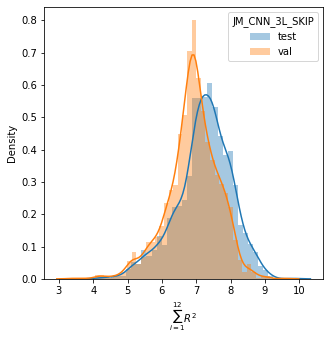

In [80]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [81]:
print_config("config_CNN_3L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.4,
          'filters': [128, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### SKIP 4Layers

In [82]:
query = {"experiment": "JM_CNN_4L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.201385774228026
StDev (test)= 0.8059355061177899
MEAN (val)= 6.871271230229861
StDev (val)= 0.7394237070331147


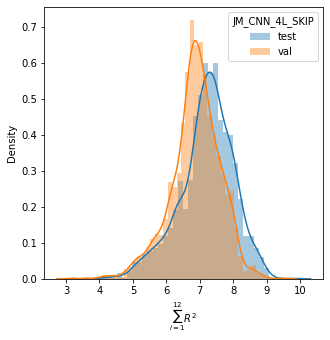

In [83]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [84]:
print_config("config_CNN_4L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}
